# import python modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# Read file ( 'Sales Transaction v.4a.csv' )

In [ ]:
# read file
df = pd.read_csv('Sales Transaction v.4a.csv')

In [ ]:
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [ ]:
# renaming any column names
df.rename(columns={'TransactionNo':'Transaction_No'}, inplace=True)

# Exploratory data analysis ( EDA )
## Part 1
### cleaning ( data types , null ...)

In [ ]:
# print the first 10 rows
df.head(10)

,Transaction_No,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
5,581475,12/9/2019,21705,Bag 500g Swirly Marbles,10.65,24,13069.0,United Kingdom
6,581475,12/9/2019,22118,Joy Wooden Block Letters,11.53,18,13069.0,United Kingdom
7,581475,12/9/2019,22119,Peace Wooden Block Letters,12.25,12,13069.0,United Kingdom
8,581475,12/9/2019,22217,T-Light Holder Hanging Lace,10.65,12,13069.0,United Kingdom
9,581475,12/9/2019,22216,T-Light Holder White Lace,10.55,24,13069.0,United Kingdom


In [ ]:
## print the data types
df.dtypes

Transaction_No     object
Date               object
ProductNo          object
ProductName        object
Price             float64
Quantity            int64
CustomerNo        float64
Country            object
dtype: object

In [ ]:
## change data type of Date to datetime64
df.Date=pd.to_datetime(df["Date"])

In [ ]:
df.dtypes

Transaction_No            object
Date              datetime64[ns]
ProductNo                 object
ProductName               object
Price                    float64
Quantity                   int64
CustomerNo               float64
Country                   object
dtype: object

In [ ]:
## check nulls and fix it
df.isna().sum()

Transaction_No     0
Date               0
ProductNo          0
ProductName        0
Price              0
Quantity           0
CustomerNo        55
Country            0
dtype: int64

In [ ]:
df[df.CustomerNo.isna()].head()

,Transaction_No,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
6511,C581406,2019-12-08,46000M,Polyester Filler Pad 45x45cm,6.19,-240,NaN,United Kingdom
6512,C581406,2019-12-08,46000S,Polyester Filler Pad 40x40cm,6.19,-300,NaN,United Kingdom
90098,C575153,2019-11-08,22947,Wooden Advent Calendar Red,44.25,-1,NaN,United Kingdom
102671,C574288,2019-11-03,22178,Victorian Glass Hanging T-Light,25.37,-1,NaN,United Kingdom
117263,C573180,2019-10-28,23048,Set Of 10 Lanterns Fairy Light Star,14.50,-1,NaN,United Kingdom


In [ ]:
df.CustomerNo=df.CustomerNo.fillna(0)

In [ ]:
df.isna().sum()

Transaction_No    0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo        0
Country           0
dtype: int64

In [ ]:
## check if there is a duplicates rowas
# hint : use df.drop_duplicates
df[df.duplicated(keep=False)]

,Transaction_No,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
984,581497,2019-12-09,21481,Fawn Blue Hot Water Bottle,7.24,1,17497.0,United Kingdom
985,581497,2019-12-09,21481,Fawn Blue Hot Water Bottle,7.24,1,17497.0,United Kingdom
1350,581538,2019-12-09,22992,Revolver Wooden Ruler,6.19,1,14446.0,United Kingdom
1354,581538,2019-12-09,22694,Wicker Star,6.19,1,14446.0,United Kingdom
1356,581538,2019-12-09,23275,Set Of 3 Hanging Owls Ollie Beak,6.19,1,14446.0,United Kingdom
...,...,...,...,...,...,...,...,...
535327,536569,2018-12-01,21809,Christmas Hanging Tree With Bell,11.53,1,16274.0,United Kingdom
535959,536592,2018-12-01,82613A,Metal Sign Cupcake Single Hook,12.82,1,16592.0,United Kingdom
535960,536592,2018-12-01,82613A,Metal Sign Cupcake Single Hook,12.82,1,16592.0,United Kingdom
536189,536528,2018-12-01,22839,3 Tier Cake Tin Green And Cream,25.57,1,15525.0,United Kingdom


In [ ]:
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
df[df.duplicated(keep=False)]

,Transaction_No,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country


### Describe the data

In [ ]:
# print describe()
df.describe()

,Price,Quantity,CustomerNo
count,531150.000000,531150.000000,531150.000000
mean,12.669787,9.988540,15221.035956
std,8.525988,217.700768,1723.519209
min,5.130000,-80995.000000,0.000000
25%,10.990000,1.000000,13798.000000
50%,11.940000,3.000000,15146.000000
75%,14.090000,10.000000,16727.000000
max,660.620000,80995.000000,18287.000000


In [ ]:
#what min and max date?
df.Date.max()

Timestamp('2019-12-09 00:00:00')

In [ ]:
df.Date.min()

Timestamp('2018-12-01 00:00:00')

In [ ]:
## how many Country in the dataset?
df.Country.nunique()

38

In [ ]:
df.Country.unique()

array(['United Kingdom', 'Norway', 'Belgium', 'Germany', 'France',
       'Austria', 'Netherlands', 'EIRE', 'USA', 'Channel Islands',
       'Iceland', 'Portugal', 'Spain', 'Finland', 'Italy', 'Greece',
       'Japan', 'Sweden', 'Denmark', 'Cyprus', 'Malta', 'Switzerland',
       'Australia', 'Czech Republic', 'Poland', 'Hong Kong', 'Singapore',
       'RSA', 'Israel', 'Unspecified', 'United Arab Emirates', 'Canada',
       'European Community', 'Bahrain', 'Brazil', 'Saudi Arabia',
       'Lebanon', 'Lithuania'], dtype=object)

In [ ]:
# create a new columns and calculate the overall cost in the order
df['Cost'] = df.Price * df.Quantity

In [ ]:
df.head()

,Transaction_No,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Cost
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64


## Part 2

### Exploratory  analysis

In [ ]:
# what is the cost revenue of product ( Lunch Bag Red Retrospot )?
df[df["ProductName"]=='Lunch Bag Red Retrospot'].Cost.sum()

114932.45000000001

In [ ]:
# top 5 customers ?
df.groupby('CustomerNo')['CustomerNo'].count().nlargest(5)

CustomerNo
17841.0    7803
14911.0    5794
14096.0    5093
12748.0    4456
14606.0    2751
Name: CustomerNo, dtype: int64

In [ ]:
# what is the most priced items?
df.groupby('ProductName')['Price'].max().nlargest(5)

ProductName
Vintage Blue Kitchen Cabinet         660.62
Vintage Red Kitchen Cabinet          660.62
Love Seat Antique White Metal        210.12
Regency Mirror With Shutters         179.37
Rustic Seventeen Drawer Sideboard    179.37
Name: Price, dtype: float64

In [ ]:
# at any month most customer spend their money?
df.set_index('Date',inplace=True)

In [ ]:
df.head(1)

,Transaction_No,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Cost
Date,,,,,,,,
2019-12-09,581482,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64


In [ ]:
df.resample('M')['Price'].sum().sort_values(ascending=False)

Date
2019-11-30    917571.27
2019-10-31    778087.26
2019-09-30    640514.88
2018-12-31    588428.93
2019-07-31    499591.85
2019-03-31    489673.86
2019-05-31    483946.48
2019-06-30    481836.26
2019-01-31    470409.19
2019-08-31    450046.04
2019-04-30    393026.04
2019-02-28    372810.70
2019-12-31    163614.70
Name: Price, dtype: float64

In [ ]:
# what is the best seller Product?
df.groupby('ProductName')['Quantity'].sum().nlargest(5)

ProductName
Popcorn Holder                       56431
World War 2 Gliders Asstd Designs    53751
Jumbo Bag Red Retrospot              47260
Assorted Colour Bird Ornament        36346
Pack Of 72 Retrospot Cake Cases      36208
Name: Quantity, dtype: int64

In [ ]:
# what is the top 5 countries in terms of orders?
df.groupby('Country')['Transaction_No'].count().nlargest(5)

Country
United Kingdom    480005
Germany            10656
France             10509
EIRE                8024
Belgium             2539
Name: Transaction_No, dtype: int64

In [ ]:
# what is the top 5 countries in terms of spending?
df.groupby('Country')['Price'].sum().nlargest(5)

Country
United Kingdom    6077852.38
Germany            134240.76
France             130556.03
EIRE               104565.96
Belgium             33477.43
Name: Price, dtype: float64

In [ ]:
# what is the best seller in Germany?
df[df['Country']=='Germany'].groupby('ProductName')['Quantity'].count().nlargest(5)

ProductName
Round Snack Boxes Set Of4 Woodland    116
Regency Cakestand 3 Tier               82
Round Snack Boxes Set Of 4 Fruits      76
Plasters In Tin Woodland Animals       65
Woodland Charlotte Bag                 61
Name: Quantity, dtype: int64

## graphs

In [ ]:
# plot a trend graph for money spending per month\
## hint: search for pandas.plot()
trend=df.resample('M')['Price'].sum().reset_index()

In [ ]:
trend

,Date,Price
0,2018-12-31,588428.93
1,2019-01-31,470409.19
2,2019-02-28,372810.70
3,2019-03-31,489673.86
4,2019-04-30,393026.04
5,2019-05-31,483946.48
6,2019-06-30,481836.26
7,2019-07-31,499591.85
8,2019-08-31,450046.04
9,2019-09-30,640514.88


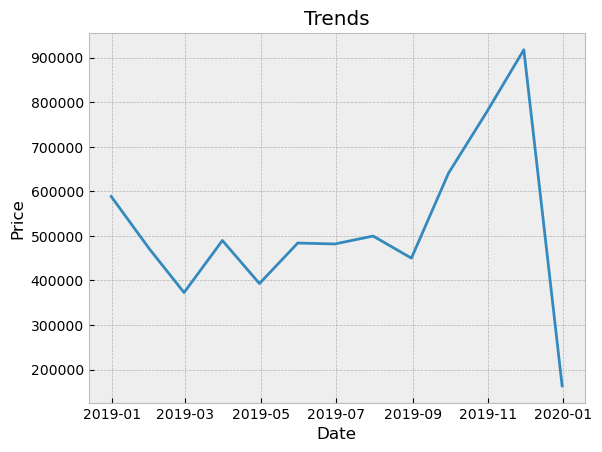

In [ ]:
sns.lineplot(data=trend, x='Date',y='Price',).set_title('Trends');

In [ ]:
# plot the top 5 countries in terms of orders
countries=df.groupby('Country')['Transaction_No'].count().nlargest(6).reset_index()

In [ ]:
countries

,Country,Transaction_No
0,United Kingdom,480005
1,Germany,10656
2,France,10509
3,EIRE,8024
4,Belgium,2539
5,Spain,2426


<AxesSubplot:xlabel='Transaction_No', ylabel='Country'>

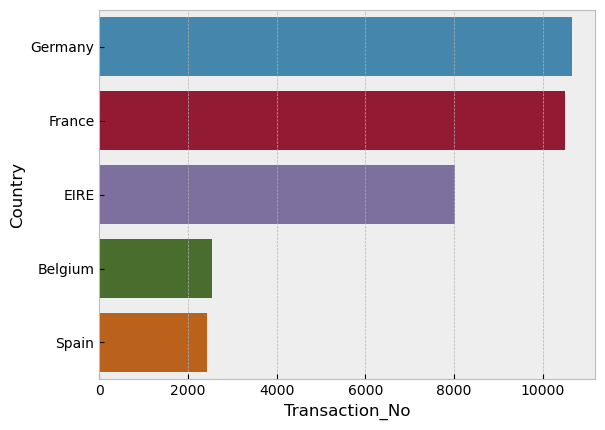

In [ ]:
sns.barplot(data=countries[1:], x="Transaction_No", y="Country",)